# Practice Lab: Neural Networks for Handwritten Digit Recognition, Binary

In this exercise, you will use a neural network to recognize the hand-written digits zero and one.


# Outline
- [ 1 - Packages ](#1)
- [ 2 - Neural Networks](#2)
  - [ 2.1 Problem Statement](#2.1)
  - [ 2.2 Dataset](#2.2)
  - [ 2.3 Model representation](#2.3)
  - [ 2.4 Tensorflow Model Implementation](#2.4)
    - [ Exercise 1](#ex01)
  - [ 2.5 NumPy Model Implementation (Forward Prop in NumPy)](#2.5)
    - [ Exercise 2](#ex02)
  - [ 2.6 Vectorized NumPy Model Implementation (Optional)](#2.6)
    - [ Exercise 3](#ex03)
  - [ 2.7 Congratulations!](#2.7)
  - [ 2.8 NumPy Broadcasting Tutorial (Optional)](#2.8)

_**NOTE:** To prevent errors from the autograder, you are not allowed to edit or delete non-graded cells in this notebook . Please also refrain from adding any new cells. 
**Once you have passed this assignment** and want to experiment with any of the non-graded code, you may follow the instructions at the bottom of this notebook._

<a name="1"></a>
## 1 - Packages 

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](https://numpy.org/) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a popular library to plot graphs in Python.
- [tensorflow](https://www.tensorflow.org/) a popular platform for machine learning.

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from autils import *
%matplotlib inline

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

**Tensorflow and Keras**  
Tensorflow is a machine learning package developed by Google. In 2019, Google integrated Keras into Tensorflow and released Tensorflow 2.0. Keras is a framework developed independently by François Chollet that creates a simple, layer-centric interface to Tensorflow. This course will be using the Keras interface. 

<a name="2"></a>
## 2 - Neural Networks

In Course 1, you implemented logistic regression. This was extended to handle non-linear boundaries using polynomial regression. For even more complex scenarios such as image recognition, neural networks are preferred.

<a name="2.1"></a>
### 2.1 Problem Statement

In this exercise, you will use a neural network to recognize two handwritten digits, zero and one. This is a binary classification task. Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes) on mail envelopes to recognizing amounts written on bank checks. You will extend this network to recognize all 10 digits (0-9) in a future assignment. 

This exercise will show you how the methods you have learned can be used for this classification task.

<a name="2.2"></a>
### 2.2 Dataset

You will start by loading the dataset for this task. 
- The `load_data()` function shown below loads the data into variables `X` and `y`


- The data set contains 1000 training examples of handwritten digits $^1$, here limited to zero and one.  

    - Each training example is a 20-pixel x 20-pixel grayscale image of the digit. 
        - Each pixel is represented by a floating-point number indicating the grayscale intensity at that location. 
        - The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector. 
        - Each training example becomes a single row in our data matrix `X`. 
        - This gives us a 1000 x 400 matrix `X` where every row is a training example of a handwritten digit image.

$$X = 
\left(\begin{array}{cc} 
--- (x^{(1)}) --- \\
--- (x^{(2)}) --- \\
\vdots \\ 
--- (x^{(m)}) --- 
\end{array}\right)$$ 

- The second part of the training set is a 1000 x 1 dimensional vector `y` that contains labels for the training set
    - `y = 0` if the image is of the digit `0`, `y = 1` if the image is of the digit `1`.

$^1$<sub> This is a subset of the MNIST handwritten digit dataset (http://yann.lecun.com/exdb/mnist/)</sub>

<a name="2"></a>
## 2 - Redes Neurais

No Curso 1, você implementou a regressão logística. Isso foi estendido para lidar com limites não lineares usando regressão polinomial. Para cenários ainda mais complexos, como reconhecimento de imagem, as redes neurais são as preferidas.

<a name="2.1"></a>
### 2.1 Declaração do Problema

Neste exercício, você usará uma rede neural para reconhecer dois dígitos manuscritos, zero e um. Esta é uma tarefa de classificação binária. O reconhecimento automatizado de dígitos manuscritos é amplamente usado hoje - desde o reconhecimento de códigos postais (códigos postais) em envelopes de correio até o reconhecimento de valores escritos em cheques bancários. Você estenderá esta rede para reconhecer todos os 10 dígitos (0-9) em uma atribuição futura.

Este exercício mostrará como os métodos que você aprendeu podem ser usados para esta tarefa de classificação.

<a name="2.2"></a>
### 2.2 Conjunto de dados

Você começará carregando o conjunto de dados para esta tarefa.
- A função `load_data()` mostrada abaixo carrega os dados nas variáveis `X` e `y`


- O conjunto de dados contém 1000 exemplos de treinamento de dígitos manuscritos $^1$, aqui limitados a zero e um.

     - Cada exemplo de treinamento é uma imagem em escala de cinza de 20 pixels x 20 pixels do dígito.
         - Cada pixel é representado por um número de ponto flutuante que indica a intensidade da escala de cinza naquele local.
         - A grade de pixels de 20 por 20 é “desenrolada” em um vetor de 400 dimensões.
         - Cada exemplo de treinamento torna-se uma única linha em nossa matriz de dados `X`.
         - Isso nos dá uma matriz `X` de 1000 x 400 onde cada linha é um exemplo de treinamento de uma imagem de dígito manuscrito.

$$X =
\left(\begin{array}{cc}
--- (x^{(1)}) --- \\
--- (x^{(2)}) --- \\
\vdots \\
--- (x^{(m)}) ---
\end{array}\right)$$

- A segunda parte do conjunto de treinamento é um vetor `y` de 1000 x 1 dimensão que contém rótulos para o conjunto de treinamento
     - `y = 0` se a imagem for do dígito `0`, `y = 1` se a imagem for do dígito `1`.

$^1$<sub> Este é um subconjunto do conjunto de dados de dígitos manuscritos MNIST (http://yann.lecun.com/exdb/mnist/)</sub>

In [3]:
# load dataset
X, y = load_data()

<a name="toc_89367_2.2.1"></a>
#### 2.2.1 View the variables
Let's get more familiar with your dataset.  
- A good place to start is to print out each variable and see what it contains.

The code below prints elements of the variables `X` and `y`.

In [4]:
print ('The first element of X is: ', X[0])

The first element of X is:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+

In [5]:
print ('The first element of y is: ', y[0,0])
print ('The last element of y is: ', y[-1,0])

The first element of y is:  0
The last element of y is:  1


<a name="toc_89367_2.2.2"></a>
#### 2.2.2 Check the dimensions of your variables

Another way to get familiar with your data is to view its dimensions. Please print the shape of `X` and `y` and see how many training examples you have in your dataset.

In [6]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (1000, 400)
The shape of y is: (1000, 1)


<a name="toc_89367_2.2.3"></a>
#### 2.2.3 Visualizing the Data

You will begin by visualizing a subset of the training set. 
- In the cell below, the code randomly selects 64 rows from `X`, maps each row back to a 20 pixel by 20 pixel grayscale image and displays the images together. 
- The label for each image is displayed above the image 

<a name="toc_89367_2.2.3"></a>
#### 2.2.3 Visualizando os Dados

Você começará visualizando um subconjunto do conjunto de treinamento.
- Na célula abaixo, o código seleciona aleatoriamente 64 linhas de `X`, mapeia cada linha de volta para uma imagem em escala de cinza de 20 por 20 pixels e exibe as imagens juntas.
- O rótulo de cada imagem é exibido acima da imagem

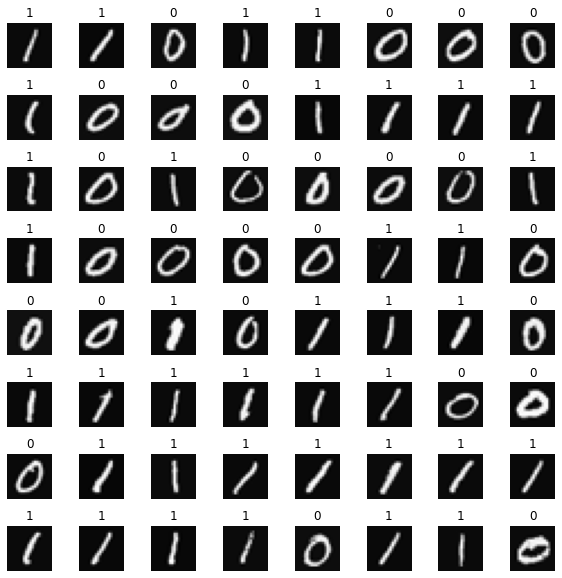

In [7]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

<a name="2.3"></a>
### 2.3 Model representation

The neural network you will use in this assignment is shown in the figure below. 
- This has three dense layers with sigmoid activations.
    - Recall that our inputs are pixel values of digit images.
    - Since the images are of size $20\times20$, this gives us $400$ inputs  
    
<img src="images/C2_W1_Assign1.PNG" width="500" height="400">

<a name="2.3"></a>
### 2.3 Representação do modelo

A rede neural que você usará nesta tarefa é mostrada na figura abaixo.
- Este possui três camadas densas com ativações sigmóides.
     - Lembre-se de que nossas entradas são valores de pixel de imagens de dígitos.
     - Como as imagens são de tamanho $20\times20$, isso nos dá entradas de $400$
    
<img src="images/C2_W1_Assign1.PNG" width="500" height="400">

<a name="2.4"></a>
### 2.4 Tensorflow Model Implementation

Tensorflow models are built layer by layer. A layer's input dimensions ($s_{in}$ above) are calculated for you. You specify a layer's *output dimensions* and this determines the next layer's input dimension. The input dimension of the first layer is derived from the size of the input data specified in the `model.fit` statement below. 
>**Note:** It is also possible to add an input layer that specifies the input dimension of the first layer. For example:  
`tf.keras.Input(shape=(400,)),    #specify input shape`  
We will include that here to illuminate some model sizing.

Os modelos do Tensorflow são construídos camada por camada. As dimensões de entrada de uma camada ($s_{in}$ acima) são calculadas para você. Você especifica as *dimensões de saída* de uma camada e isso determina a dimensão de entrada da próxima camada. A dimensão de entrada da primeira camada é derivada do tamanho dos dados de entrada especificados na instrução `model.fit` abaixo.
>**Nota:** Também é possível adicionar uma camada de entrada que especifica a dimensão de entrada da primeira camada. Por exemplo:
`tf.keras.Input(shape=(400,)), #specify input shape`
Incluiremos isso aqui para iluminar o dimensionamento de alguns modelos.

<a name="ex01"></a>
### Exercise 1

Below, using Keras [Sequential model](https://keras.io/guides/sequential_model/) and [Dense Layer](https://keras.io/api/layers/core_layers/dense/) with a sigmoid activation to construct the network described above.

<a name="ex01"></a>
### Exercício 1

Abaixo, usando Keras [modelo sequencial](https://keras.io/guides/sequential_model/) e [Camada densa](https://keras.io/api/layers/core_layers/dense/) com uma ativação sigmoide para construir a rede descrita acima.

In [11]:
# UNQ_C1
# GRADED CELL: Sequential model

model = Sequential(
    [               
        tf.keras.Input(shape=(400,)),    #specify input size
        ### START CODE HERE ###
        Dense(25, activation='sigmoid', name='layer1'),
        Dense(15, activation='sigmoid', name='layer2'),
        Dense(1, activation='sigmoid', name='layer3')
               
        ### END CODE HERE ### 
    ], name = "my_model" 
)                            


In [12]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 25)                10025     
                                                                 
 layer2 (Dense)              (None, 15)                390       
                                                                 
 layer3 (Dense)              (None, 1)                 16        
                                                                 
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________


In [13]:
# UNIT TESTS
from public_tests import *

test_c1(model)

All tests passed!


The parameter counts shown in the summary correspond to the number of elements in the weight and bias arrays as shown below.

As contagens de parâmetros mostradas no resumo correspondem ao número de elementos nas matrizes de peso e viés, conforme mostrado abaixo.

In [14]:
L1_num_params = 400 * 25 + 25  # W1 parameters  + b1 parameters
L2_num_params = 25 * 15 + 15   # W2 parameters  + b2 parameters
L3_num_params = 15 * 1 + 1     # W3 parameters  + b3 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params, ",  L3 params = ", L3_num_params )

L1 params =  10025 , L2 params =  390 ,  L3 params =  16


We can examine details of the model by first extracting the layers with `model.layers` and then extracting the weights with `layerx.get_weights()` as shown below.

Podemos examinar os detalhes do modelo extraindo primeiro as camadas com `model.layers` e depois extraindo os pesos com `layerx.get_weights()` conforme mostrado abaixo.

In [15]:
[layer1, layer2, layer3] = model.layers

In [16]:
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


`xx.get_weights` returns a NumPy array. One can also access the weights directly in their tensor form. Note the shape of the tensors in the final layer.

`xx.get_weights` retorna um array NumPy. Também é possível acessar os pesos diretamente em sua forma de tensor. Observe a forma dos tensores na camada final.

In [17]:
print(model.layers[2].weights)

[<tf.Variable 'layer3/kernel:0' shape=(15, 1) dtype=float32, numpy=
array([[-0.0854066 ],
       [ 0.42030424],
       [-0.4553826 ],
       [ 0.11718225],
       [ 0.10671079],
       [-0.17040518],
       [-0.2748226 ],
       [ 0.15772223],
       [ 0.47030562],
       [-0.49654055],
       [ 0.379871  ],
       [-0.23909658],
       [-0.11788207],
       [ 0.36945152],
       [-0.41013673]], dtype=float32)>, <tf.Variable 'layer3/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


The following code will define a loss function and run gradient descent to fit the weights of the model to the training data. This will be explained in more detail in the following week.

O código a seguir definirá uma função de perda e executará a descida do gradiente para ajustar os pesos do modelo aos dados de treinamento. Isso será explicado com mais detalhes na próxima semana.

In [18]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X,y,
    epochs=20
)

Epoch 1/20
32/32 [==============================] - 1s 2ms/step - loss: 0.6362
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 0.4964
Epoch 3/20
32/32 [==============================] - 0s 1ms/step - loss: 0.3499
Epoch 4/20
32/32 [==============================] - 0s 1ms/step - loss: 0.2427
Epoch 5/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1763
Epoch 6/20
32/32 [==============================] - 0s 3ms/step - loss: 0.1344
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1063
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0867
Epoch 9/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0722
Epoch 10/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0614
Epoch 11/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0531
Epoch 12/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0466
Epoch 13/20
32/32 [==============================

To run the model on an example to make a prediction, use [Keras `predict`](https://www.tensorflow.org/api_docs/python/tf/keras/Model). The input to `predict` is an array so the single example is reshaped to be two dimensional.

Para executar o modelo em um exemplo para fazer uma previsão, use [Keras `predict`](https://www.tensorflow.org/api_docs/python/tf/keras/Model). A entrada para `prever` é uma matriz, então o único exemplo é reformulado para ser bidimensional.

In [19]:
prediction = model.predict(X[0].reshape(1,400))  # a zero
print(f" predicting a zero: {prediction}")
prediction = model.predict(X[500].reshape(1,400))  # a one
print(f" predicting a one:  {prediction}")

1/1 [==============================] - 0s 80ms/step
 predicting a zero: [[0.01580009]]
1/1 [==============================] - 0s 17ms/step
 predicting a one:  [[0.9811224]]


The output of the model is interpreted as a probability. In the first example above, the input is a zero. The model predicts the probability that the input is a one is nearly zero. 
In the second example, the input is a one. The model predicts the probability that the input is a one is nearly one.
As in the case of logistic regression, the probability is compared to a threshold to make a final prediction.

A saída do modelo é interpretada como uma probabilidade. No primeiro exemplo acima, a entrada é um zero. O modelo prevê que a probabilidade de que a entrada seja um é quase zero.
No segundo exemplo, a entrada é um. O modelo prevê que a probabilidade de que a entrada seja um é quase um.
Como no caso da regressão logística, a probabilidade é comparada a um limite para fazer uma previsão final.

In [20]:
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print(f"prediction after threshold: {yhat}")

prediction after threshold: 1


Let's compare the predictions vs the labels for a random sample of 64 digits. This takes a moment to run.

1/1 [==============================] - 0s 19ms/step


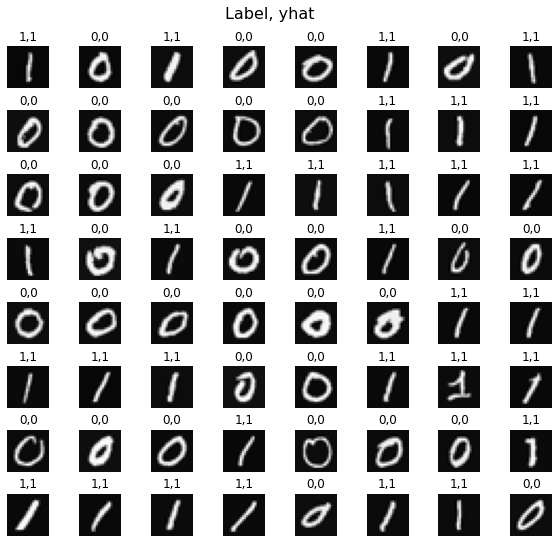

In [21]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=16)
plt.show()

<a name="2.5"></a>
### 2.5 NumPy Model Implementation (Forward Prop in NumPy)
As described in lecture, it is possible to build your own dense layer using NumPy. This can then be utilized to build a multi-layer neural network. 

<img src="images/C2_W1_dense2.PNG" width="600" height="450">

<a name="ex02"></a>
### Exercise 2

Below, build a dense layer subroutine. The example in lecture utilized a for loop to visit each unit (`j`) in the layer and perform the dot product of the weights for that unit (`W[:,j]`) and sum the bias for the unit (`b[j]`) to form `z`. An activation function `g(z)` is then applied to that result. This section will not utilize some of the matrix operations described in the optional lectures. These will be explored in a later section.

<a name="ex02"></a>
### Exercício 2

Abaixo, construa uma sub-rotina de camada densa. O exemplo da aula utilizou um loop for para visitar cada unidade (`j`) na camada e executar o produto escalar dos pesos dessa unidade (`W[:,j]`) e somar o viés para a unidade (` b[j]`) para formar `z`. Uma função de ativação `g(z)` é então aplicada a esse resultado. Esta seção não utilizará algumas das operações de matriz descritas nas aulas opcionais. Estes serão explorados em uma seção posterior.

In [22]:
# UNQ_C2
# GRADED FUNCTION: my_dense

def my_dense(a_in, W, b, g):
    """
    Computes dense layer
    Args:
      a_in (ndarray (n, )) : Data, 1 example 
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units
      b    (ndarray (j, )) : bias vector, j units  
      g    activation function (e.g. sigmoid, relu..)
    Returns
      a_out (ndarray (j,))  : j units
    """
    units = W.shape[1]
    a_out = np.zeros(units)
### START CODE HERE ###

    for j in range(units):
        w = W[:,j]
        z = np.dot(w, a_in) + b[j]
        a_out[j] =g(z)
        
### END CODE HERE ### 
    return(a_out)

In [23]:
# Quick Check
x_tst = 0.1*np.arange(1,3,1).reshape(2,)  # (1 examples, 2 features)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3) # (2 input features, 3 output features)
b_tst = 0.1*np.arange(1,4,1).reshape(3,)  # (3 features)
A_tst = my_dense(x_tst, W_tst, b_tst, sigmoid)
print(A_tst)

[0.54735762 0.57932425 0.61063923]


In [24]:
# UNIT TESTS

test_c2(my_dense)

All tests passed!


The following cell builds a three-layer neural network utilizing the `my_dense` subroutine above.

In [25]:
def my_sequential(x, W1, b1, W2, b2, W3, b3):
    a1 = my_dense(x,  W1, b1, sigmoid)
    a2 = my_dense(a1, W2, b2, sigmoid)
    a3 = my_dense(a2, W3, b3, sigmoid)
    return(a3)

We can copy trained weights and biases from Tensorflow.

In [27]:
W1_tmp,b1_tmp = layer1.get_weights()
W2_tmp,b2_tmp = layer2.get_weights()
W3_tmp,b3_tmp = layer3.get_weights()

In [28]:
# make predictions
prediction = my_sequential(X[0], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print( "yhat = ", yhat, " label= ", y[0,0])
prediction = my_sequential(X[500], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print( "yhat = ", yhat, " label= ", y[500,0])

yhat =  0  label=  0
yhat =  1  label=  1


Run the following cell to see predictions from both the Numpy model and the Tensorflow model. This takes a moment to run.

1/1 [==============================] - 0s 17ms/step


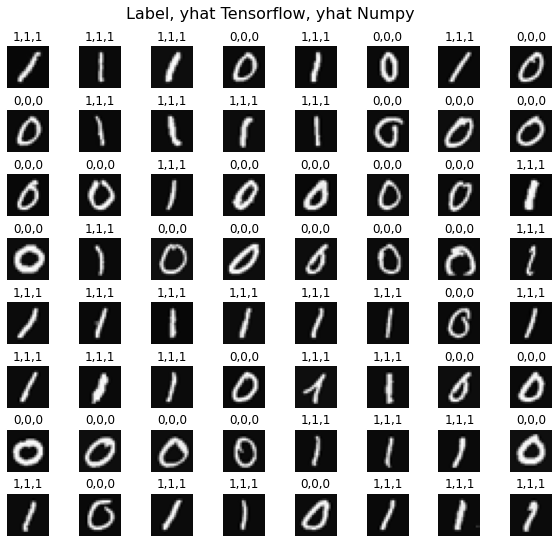

In [29]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Predict using the Neural Network implemented in Numpy
    my_prediction = my_sequential(X[random_index], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
    my_yhat = int(my_prediction >= 0.5)

    # Predict using the Neural Network implemented in Tensorflow
    tf_prediction = model.predict(X[random_index].reshape(1,400))
    tf_yhat = int(tf_prediction >= 0.5)
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{tf_yhat},{my_yhat}")
    ax.set_axis_off() 
fig.suptitle("Label, yhat Tensorflow, yhat Numpy", fontsize=16)
plt.show()

<a name="2.6"></a>
### 2.6 Vectorized NumPy Model Implementation (Optional)
The optional lectures described vector and matrix operations that can be used to speed the calculations.
Below describes a layer operation that computes the output for all units in a layer on a given input example:

<img src="images/C2_W1_VectorMatrix.PNG" width="600" height="450">

We can demonstrate this using the examples `X` and the `W1`,`b1` parameters above. We use `np.matmul` to perform the matrix multiply. Note, the dimensions of x and W must be compatible as shown in the diagram above.

In [30]:
x = X[0].reshape(-1,1)         # column vector (400,1)
z1 = np.matmul(x.T,W1) + b1    # (1,400)(400,25) = (1,25)
a1 = sigmoid(z1)
print(a1.shape)

(1, 25)


You can take this a step further and compute all the units for all examples in one Matrix-Matrix operation.

<img src="images/C2_W1_MatrixMatrix.PNG" width="600" height="450">
The full operation is $\mathbf{Z}=\mathbf{XW}+\mathbf{b}$. This will utilize NumPy broadcasting to expand $\mathbf{b}$ to $m$ rows. If this is unfamiliar, a short tutorial is provided at the end of the notebook.

<a name="ex03"></a>
### Exercise 3

Below, compose a new `my_dense_v` subroutine that performs the layer calculations for a matrix of examples. This will utilize `np.matmul()`.

_**Note**: This function is not graded because it is discussed in the optional lectures on vectorization. If you didn't go through them, feel free to click the hints below the expected code to see the code. You can also submit the notebook even with a blank answer here._

In [31]:
# UNQ_C3
# UNGRADED FUNCTION: my_dense_v

def my_dense_v(A_in, W, b, g):
    """
    Computes dense layer
    Args:
      A_in (ndarray (m,n)) : Data, m examples, n features each
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units
      b    (ndarray (1,j)) : bias vector, j units  
      g    activation function (e.g. sigmoid, relu..)
    Returns
      A_out (tf.Tensor or ndarray (m,j)) : m examples, j units
    """
### START CODE HERE ###
    Z = np.matmul(A_in, W) + b
    A_out = g(Z)
    
    
### END CODE HERE ### 
    return(A_out)

In [32]:
X_tst = 0.1*np.arange(1,9,1).reshape(4,2) # (4 examples, 2 features)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3) # (2 input features, 3 output features)
b_tst = 0.1*np.arange(1,4,1).reshape(1,3) # (1,3 features)
A_tst = my_dense_v(X_tst, W_tst, b_tst, sigmoid)
print(A_tst)

[[0.54735762 0.57932425 0.61063923]
 [0.57199613 0.61301418 0.65248946]
 [0.5962827  0.64565631 0.6921095 ]
 [0.62010643 0.67699586 0.72908792]]


In [33]:
# UNIT TESTS

test_c3(my_dense_v)

All tests passed!
